In [429]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

In [430]:
ca = pd.read_csv('dogma5.csv')
#ca.head(12)

In [431]:
#ca.info()

In [432]:
#for column in ca.columns[1:]:  
    #ca.loc[1:, column] = ca.loc[1:, column].replace(0, np.nan)


#ca = ca.astype({col: 'float64' for col in ca.columns[1:]})

#for column in ca.columns[1:]:  
    #ca.loc[1:, column] = ca.loc[1:, column].replace(0, np.nan)


#ca = ca.astype({col: 'float64' for col in ca.columns[1:]})


#ca.iloc[:, 1:] = ca.iloc[:, 1:].fillna(ca.mean(numeric_only=True))

#ca.iloc[0] = ca.iloc[0].apply(lambda x: int(x) if pd.api.types.is_numeric_dtype(x) else x)

#ca.to_csv('dogma4.csv', index=False)

In [433]:
#ca.iloc[:, 1:] = ca.iloc[:, 1:].apply(lambda col: col.apply(lambda x: int(x) if isinstance(x, (int, float)) else x))

#ca.to_csv('dogma4.csv', index=False)

In [434]:
#threshold = 0.52
#ca = ca.loc[:, ca.isnull().mean(axis=0) < threshold]

In [435]:
#threshold = 0.52
#ca = ca[ca.isnull().mean(axis=1) < threshold]

In [436]:
ca.head(8)

,2022-11-01,1,0,0.1,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0.1,0.0.2,0.0.3,0.0.4,...,6522297.291637906,6394747.676909916,6456498.570592036,274.6188739789965,271.6085180863477,273.10719564371834,7062679.317856605,6920071.582174959,6989574.545634552,0.2562613816564786
0,2022-11-01,5,0,1,NaN,0.0,0.0,0.0,0.0,0.0,...,5.903704e+06,5.903704e+06,5.903704e+06,362.000000,362.000000,362.000000,7.616803e+06,7.616803e+06,7.616803e+06,0.256261
1,2022-05-01,6,0,0,NaN,0.0,0.0,0.0,0.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
2,2022-09-01,7,0,0,NaN,1.0,1.0,1.0,1.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.258682
3,2022-08-01,8,0,0,NaN,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.254164
4,2023-02-01,10,0,0,NaN,0.0,0.0,1.0,1.0,1.0,...,1.085000e+07,1.085000e+07,1.085000e+07,362.000000,362.000000,362.000000,1.085000e+07,1.085000e+07,1.085000e+07,0.318994
5,2022-11-01,16,0,0,NaN,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.258853
6,2023-01-01,17,0,0,NaN,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
7,2023-01-01,18,0,0,NaN,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.266285


<Figure size 1000x100 with 0 Axes>

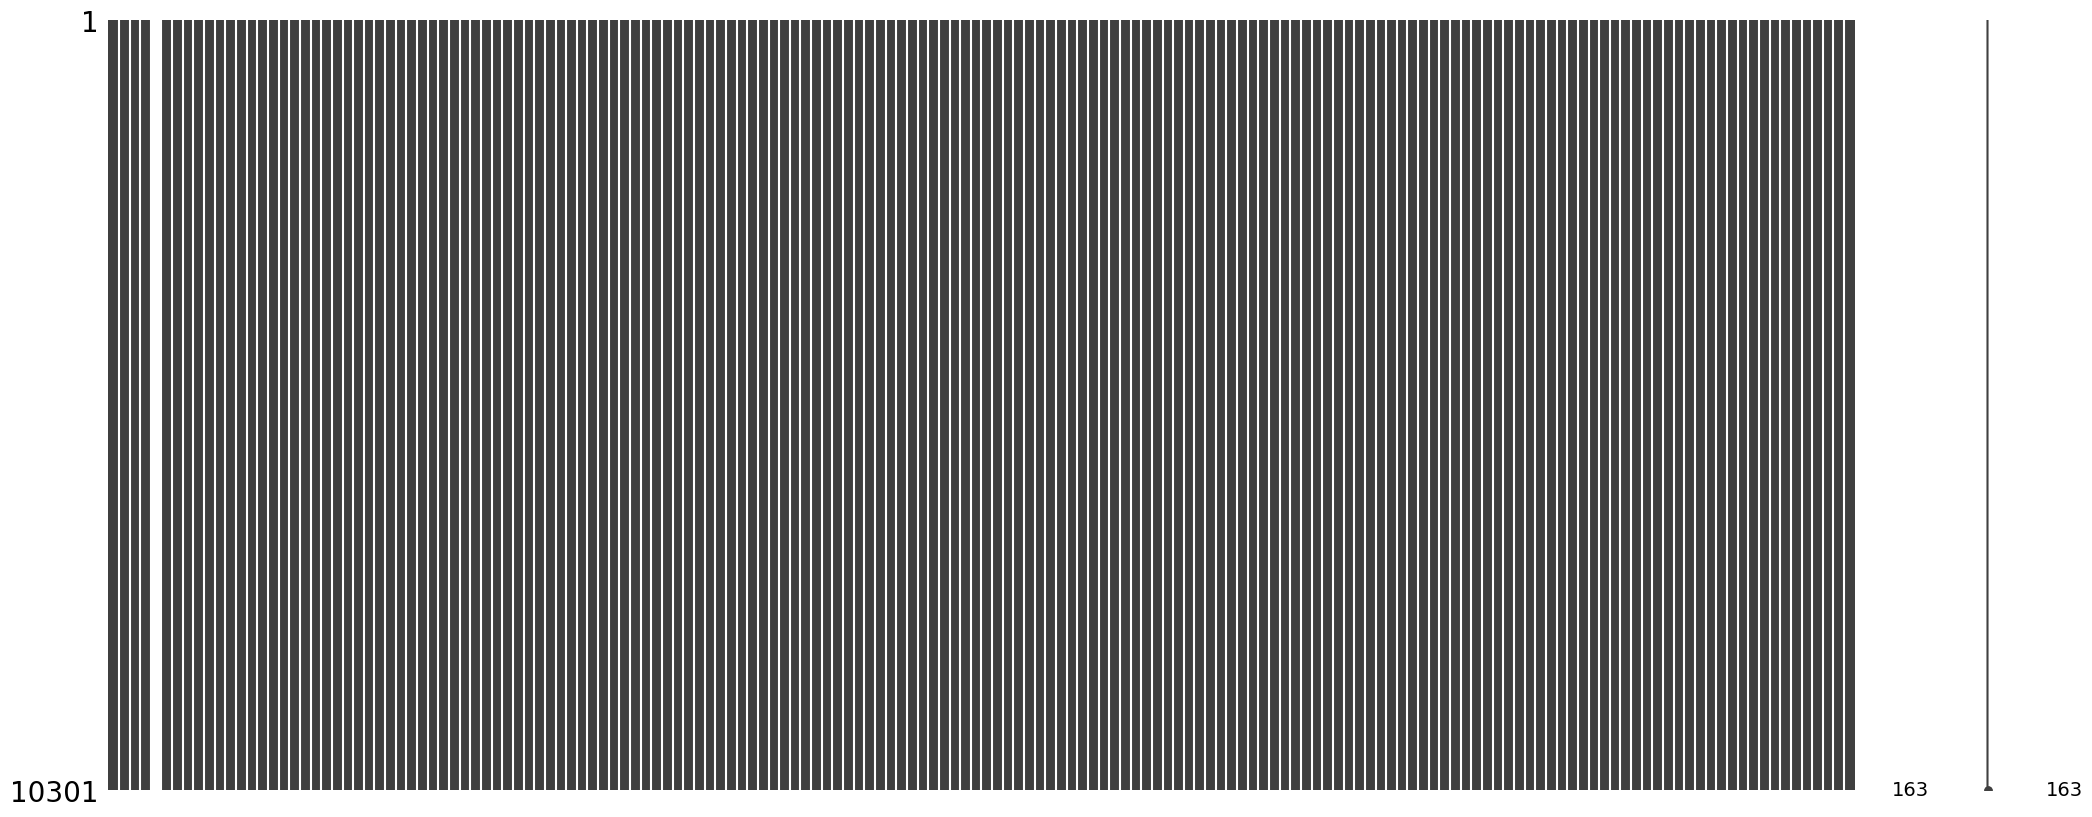

In [437]:
plt.figure(figsize=(10, 1))
msno.matrix(ca)
plt.show()

In [438]:
ca.iloc[:, 1:] = ca.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Заменяем отрицательные значения на NaN
ca.iloc[:, 1:] = ca.iloc[:, 1:].apply(lambda col: col.where(col >= 0, float('nan')))

# Заполняем пропуски средним значением, вычисленным только по положительным данным
ca.iloc[:, 1:] = ca.iloc[:, 1:].apply(lambda col: col.fillna(col[col >= 0].mean()))

# Сохраняем изменения в новый CSV файл
ca.to_csv('dogma5.csv', index=False)

In [439]:
#numeric_cols = ca.select_dtypes(include='number').columns  # Выбираем только числовые столбцы
#ca[numeric_cols] = ca[numeric_cols].fillna(ca[numeric_cols].mean())  # Заполняем пустые значения средним

# Перезапись файла

#ca.drop(ca.columns[:2], axis=1, inplace=True)
ca.isnull().sum()
ca.to_csv('dogma5.csv', index=False)

<Figure size 1000x100 with 0 Axes>

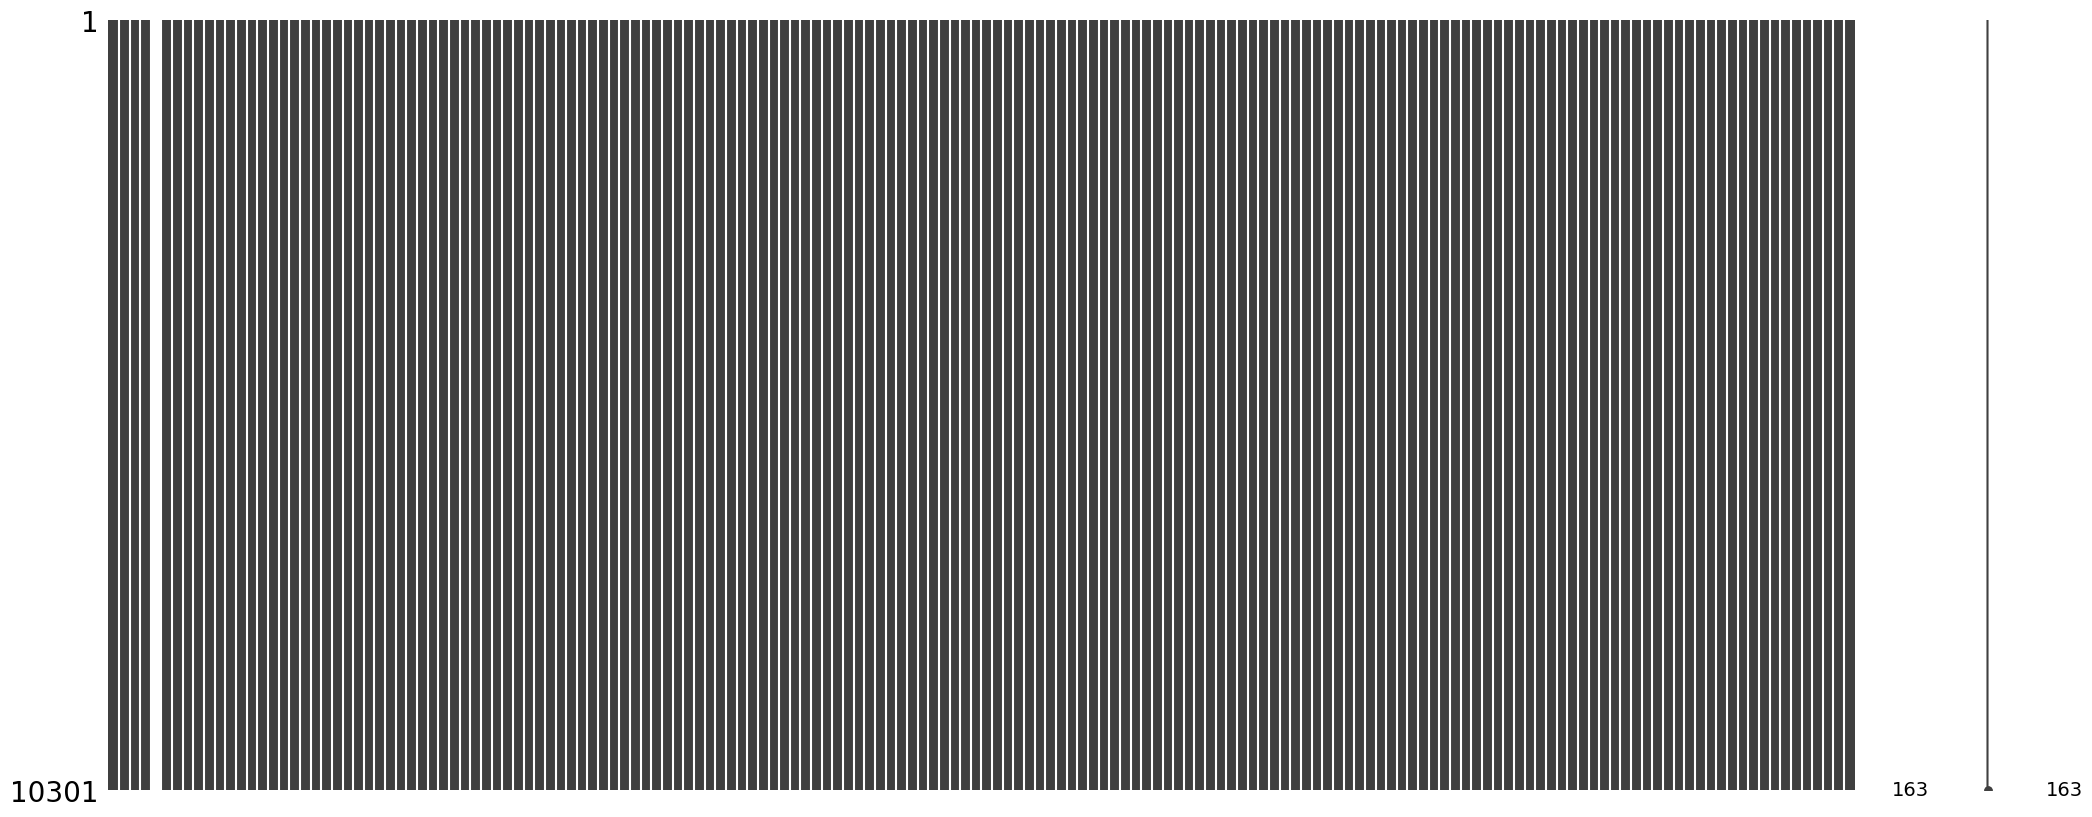

In [440]:
plt.figure(figsize=(10, 1))
msno.matrix(ca)
plt.show()

In [441]:
ca.head(8)

,2022-11-01,1,0,0.1,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0.1,0.0.2,0.0.3,0.0.4,...,6522297.291637906,6394747.676909916,6456498.570592036,274.6188739789965,271.6085180863477,273.10719564371834,7062679.317856605,6920071.582174959,6989574.545634552,0.2562613816564786
0,2022-11-01,5,0,1,NaN,0.0,0.0,0.0,0.0,0.0,...,5.903704e+06,5.903704e+06,5.903704e+06,362.000000,362.000000,362.000000,7.616803e+06,7.616803e+06,7.616803e+06,0.256261
1,2022-05-01,6,0,0,NaN,0.0,0.0,0.0,0.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
2,2022-09-01,7,0,0,NaN,1.0,1.0,1.0,1.0,1.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.258682
3,2022-08-01,8,0,0,NaN,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.254164
4,2023-02-01,10,0,0,NaN,0.0,0.0,1.0,1.0,1.0,...,1.085000e+07,1.085000e+07,1.085000e+07,362.000000,362.000000,362.000000,1.085000e+07,1.085000e+07,1.085000e+07,0.318994
5,2022-11-01,16,0,0,NaN,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.258853
6,2023-01-01,17,0,0,NaN,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.256261
7,2023-01-01,18,0,0,NaN,0.0,0.0,0.0,0.0,0.0,...,6.522297e+06,6.394748e+06,6.456499e+06,274.618874,271.608518,273.107196,7.062679e+06,6.920072e+06,6.989575e+06,0.266285
